In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, opinion_lexicon
import string
from string import punctuation
import collections
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import en_core_web_sm
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score

In [2]:
from sklearn.preprocessing import StandardScaler


In [4]:
!pip install -U pip setuptools wheel --user
!pip install -U spacy --user
!python -m spacy download en_core_web_sm

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
distutils: C:\Users\werbr\AppData\Roaming\Python\Python38\Include\UNKNOWN
sysconfig: C:\Users\werbr\AppData\Roaming\Python\Python38\Include
user = True
home = None
root = None
prefix = None



  Using cached setuptools-56.0.0-py3-none-any.whl (784 kB)
  Using cached wheel-0.36.2-py2.py3-none-any.whl (35 kB)


distutils: C:\Users\werbr\AppData\Roaming\Python\Python38\Include\UNKNOWN
sysconfig: C:\Users\werbr\AppData\Roaming\Python\Python38\Include
user = True
home = None
root = None
prefix = None
distutils: C:\Users\werbr\anaconda3\Include\UNKNOWN
sysconfig: C:\Users\werbr\anaconda3\Include
user = False
home = None
root = None
prefix = None
distutils: C:\Users\werbr\anaconda3\Include\UNKNOWN
sysconfig: C:\Users\werbr\anaconda3\Include
user = False
home = None

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



root = None
prefix = None


In [6]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\werbr\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [7]:
def clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r'(@[A-Za-z0–9]+)|(\w+:\/\/\S+)|^rt|http.+?', '',   elem)) 
    return df

trump_tweets = pd.read_csv('C:/Users/werbr/Downloads/Archive/hashtag_donaldtrump.csv', lineterminator='\n')
trump_tweets = clean_text(trump_tweets, 'tweet')
trump_tweets.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#elecciones2020 | en #florida: #joebiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"usa 2020, trump contro facebook e twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#trump: as a student i used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #trump! maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,you get a tie! and you get a tie! #trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


In [22]:
nltk.download('stopwords')
nltk.download('opinion_lexicon')
pos = opinion_lexicon.positive()
neg = opinion_lexicon.negative()

pos[:4]
neg[:4]

positive_words = " ".join(pos)
negative_words = " ".join(neg)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\werbr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\werbr\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


'2-faced 2-faces abnormal abolish abominable abominably abominate abomination abort aborted aborts abrade abrasive abrupt abruptly abscond absence absent-minded absentee absurd absurdity absurdly absurdness abuse abused abuses abusive abysmal abysmally abyss accidental accost accursed accusation accusations accuse accuses accusing accusingly acerbate acerbic acerbically ache ached aches achey aching acrid acridly acridness acrimonious acrimoniously acrimony adamant adamantly addict addicted addicting addicts admonish admonisher admonishingly admonishment admonition adulterate adulterated adulteration adulterier adversarial adversary adverse adversity afflict affliction afflictive affront afraid aggravate aggravating aggravation aggression aggressive aggressiveness aggressor aggrieve aggrieved aggrivation aghast agonies agonize agonizing agonizingly agony aground ail ailing ailment aimless alarm alarmed alarming alarmingly alienate alienated alienation allegation allegations allege alle

In [10]:
nlp = en_core_web_sm.load() 
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation) 
stop.update(punctuation)
w_tokenizer = WhitespaceTokenizer()
def furnished(text):
    final_text = []
    for i in w_tokenizer.tokenize(text):
       if i.lower() not in stop:
           word = lemmatizer.lemmatize(i)
           final_text.append(word.lower())
    return ' '.join(final_text)

trump_tweets.tweet = trump_tweets.tweet.apply(furnished)

trump_tweets.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#elecciones2020 en #florida: #joebiden dice qu...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"usa 2020, trump contro facebook e twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#trump: student used hear years, ten years, he...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hour since last tweet #trump! maybe busy. tr...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,get tie! get tie! #trump ‘s rally #iowa,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


In [24]:
positive = furnished(positive_words)
negative = furnished(negative_words)

In [25]:
string1 = positive
words = string1.split()
positive = " ".join(sorted(set(words), key=words.index))
positive

string1 = negative
words = string1.split()
negative = " ".join(sorted(set(words), key=words.index))
negative

'2-faced 2-faces abnormal abolish abominable abominably abominate abomination abort aborted abrade abrasive abrupt abruptly abscond absence absent-minded absentee absurd absurdity absurdly absurdness abuse abused abusive abysmal abysmally abyss accidental accost accursed accusation accuse accuses accusing accusingly acerbate acerbic acerbically ache ached achey aching acrid acridly acridness acrimonious acrimoniously acrimony adamant adamantly addict addicted addicting admonish admonisher admonishingly admonishment admonition adulterate adulterated adulteration adulterier adversarial adversary adverse adversity afflict affliction afflictive affront afraid aggravate aggravating aggravation aggression aggressive aggressiveness aggressor aggrieve aggrieved aggrivation aghast agony agonize agonizing agonizingly aground ail ailing ailment aimless alarm alarmed alarming alarmingly alienate alienated alienation allegation allege allergic allergy aloof altercation ambiguity ambiguous ambivalen

In [26]:

def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)
def get_scores(group,tweet):
    scores = []
    for tweets in tweet:
        s = jaccard_similarity(group, tweets)
        scores.append(s)
    return scores

In [27]:
pos_score = get_scores(positive, trump_tweets.tweet.to_list())
neg_score = get_scores(negative, trump_tweets.tweet.to_list())

In [28]:
pos_score
neg_score

[0.5116279069767442,
 0.5555555555555556,
 0.45454545454545453,
 0.5714285714285714,
 0.42857142857142855,
 0.6052631578947368,
 0.46153846153846156,
 0.6571428571428571,
 0.6176470588235294,
 0.5,
 0.6486486486486487,
 0.631578947368421,
 0.6285714285714286,
 0.46153846153846156,
 0.5555555555555556,
 0.5476190476190477,
 0.47368421052631576,
 0.6,
 0.15151515151515152,
 0.46153846153846156,
 0.6216216216216216,
 0.5945945945945946,
 0.5945945945945946,
 0.5641025641025641,
 0.55,
 0.6388888888888888,
 0.5128205128205128,
 0.5833333333333334,
 0.6388888888888888,
 0.6052631578947368,
 0.5526315789473685,
 0.6571428571428571,
 0.5476190476190477,
 0.6,
 0.6571428571428571,
 0.5555555555555556,
 0.6216216216216216,
 0.4857142857142857,
 0.6153846153846154,
 0.4444444444444444,
 0.6571428571428571,
 0.42424242424242425,
 0.5789473684210527,
 0.6285714285714286,
 0.5151515151515151,
 0.5952380952380952,
 0.38235294117647056,
 0.4411764705882353,
 0.47058823529411764,
 0.6,
 0.621621621621

In [30]:
# create a jaccard scored df.
data  = {'names':trump_tweets.user_name.to_list(),       'positive_score':pos_score, 'negative_score':neg_score}
scores_df = pd.DataFrame(data)

#assign classes based on highest score
def get_classes(l1, l2):
    posi = []
    negat = []
    for i, j in zip(l1, l2):
        m = max(i, j)
        if m == i:
            posi.append(1)
        else:
            posi.append(0)
        if m == j:
            negat.append(1)
        else:
            negat.append(0)        
         
            
    return posi, negat
l1 = scores_df.positive_score.to_list()
l2 = scores_df.negative_score.to_list()
posi, negat = get_classes(l1, l2)
data = {'name': scores_df.names.to_list(), 'positive tweets':posi, 'negative tweets':negat}
class_df = pd.DataFrame(data)
#grouping the tweets by username
new_groups_df = class_df.groupby(['name']).sum()
#add a new totals column
new_groups_df['total'] = new_groups_df['positive tweets'] + new_groups_df['negative tweets']
#add a new totals row
new_groups_df.loc["Total"] = new_groups_df.sum()  

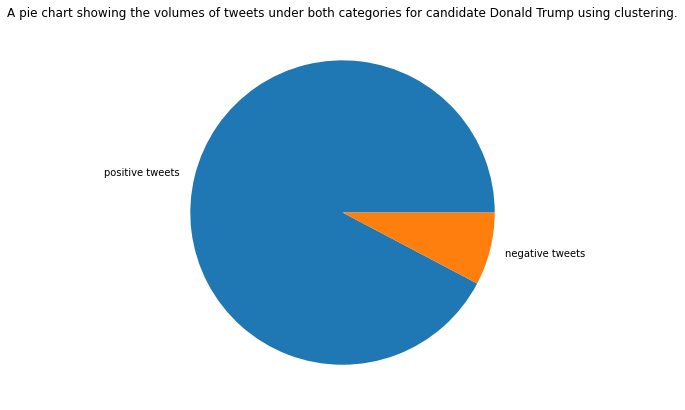

In [36]:
fig = plt.figure(figsize =(10, 7)) 
a = new_groups_df.drop(['total'], axis = 1)
plt.pie(a.loc['Total'], labels = a.columns)
plt.title('A pie chart showing the volumes of tweets under both categories for candidate Donald Trump using clustering.')
plt.show()


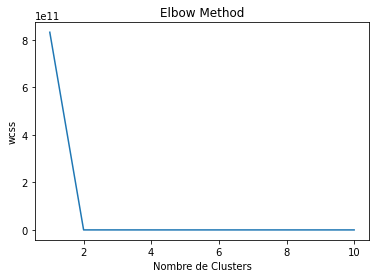

,positive tweets,negative tweets,total
name,,,
B-Smooth Cromwell,1,0,1
Hellppy Reinoso,1,0,1
LinSteve,0,1,1
OranGe CaB,1,0,1
Scisco,0,1,1
...,...,...,...
🪐M,0,1,1
🪐🌌Syn🌌🪐,1,0,1
🪔episro 🪔⛑TED ⛑,1,0,1


In [100]:
#2D K-means Clustering
#Elbo
X = new_groups_df[['positive tweets', 'negative tweets']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Nombre de Clusters')
plt.ylabel('wcss')
plt.show()

new_groups_df

                        positive tweets  negative tweets  total
name                                                           
 B-Smooth Cromwell                    1                0      1
 Hellppy Reinoso                      1                0      1
 LinSteve                             0                1      1
 OranGe CaB                           1                0      1
 Scisco                               0                1      1
...                                 ...              ...    ...
🪐M                                    0                1      1
🪐🌌Syn🌌🪐                               1                0      1
🪔episro 🪔⛑TED ⛑                       1                0      1
🪴Michele C                            1                0      1
🪴🌌🇺🇸 Sheri Hooper 🇺🇸🌌🪴                2                0      2

[285085 rows x 3 columns]
                        positive tweets  negative tweets  total
name                                                           
 B-Smooth Cro

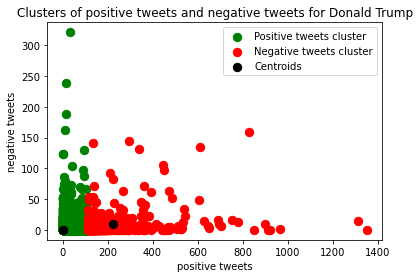

In [118]:
# fitting kmeans to dataset
index = new_groups_df[new_groups_df['positive tweets'] == 908962 ].index
new_groups_df.drop(index, inplace=True)

X2 = new_groups_df[['positive tweets', 'negative tweets']].values

kmeans = KMeans(n_clusters=2, random_state=0)
Y_means = kmeans.fit_predict(X2)

plt.scatter(X2[Y_means==0, 0], X2[Y_means==0, 1], s=70, c='green', label= 'Positive tweets cluster')
plt.scatter(X2[Y_means==1, 0], X2[Y_means==1, 1], s=70, c='red', label= 'Negative tweets cluster')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=70, c='black', label='Centroids' )
plt.title('Clusters of positive tweets and negative tweets for Donald Trump')
plt.xlabel('positive tweets')
plt.ylabel('negative tweets')
plt.legend()
plt.show()






In [98]:
%matplotlib inline
import re
import sqlite3
import pandas as pd
import numpy as np
import nltk
import tqdm as tqdm
import string
from nltk.corpus import stopwords
stop = stopwords.words("english")
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')

from gensim import summarize
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from math import floor,ceil

from sklearn.svm import LinearSVC

from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
import seaborn as sns

ImportError: cannot import name 'summarize' from 'gensim' (/opt/anaconda3/lib/python3.8/site-packages/gensim/__init__.py)

In [ ]:
!pip uninstall gensim
!pip install gensim
!pip install --upgrade gensim